In [20]:
import os
import numpy as np
from pyAudioAnalysis import audioSegmentation as aS
from pyAudioAnalysis import audioBasicIO

# Função para segmentar um único arquivo de áudio
def segment_audio(input_path, output_path):
    [Fs, x] = audioBasicIO.read_audio_file(input_path)
    segments = aS.speaker_diarization(input_path, n_speakers=2, mid_window=2.0, mid_step=0.2, lda_dim=1)
    with open(output_path, "w") as f:
        for i, segment in enumerate(segments):
            start = i * 2.0  # Assuming 2.0 seconds mid-term window
            end = start + 2.0
            # Verificar se segment é um valor escalar
            if np.isscalar(segment):
                speaker = "Speaker 1" if segment == 0 else "Speaker 2"
            else:
                # Obter o valor único de segment se for uma matriz
                speaker = "Speaker 1" if np.all(segment == 0) else "Speaker 2"
            f.write(f"{speaker}: from {start:.2f} to {end:.2f} seconds\n")

# Caminhos das pastas de entrada e saída
input_folders = ['cd', 'cc']
output_folder = 'segmented_audios'

# Criar a pasta de saída se não existir
os.makedirs(output_folder, exist_ok=True)

# Percorrer todas as subpastas e arquivos de áudio
for folder in input_folders:
    folder_path = os.path.join(r'C:\Users\Lenovo\Desktop\IC\[99] ADRESS-20 Database\ADReSS-IS2020-data\train\Full_wave_enhanced_audio', folder)  # Substitua pelo caminho correto
    for audio_file in os.listdir(folder_path):
        if audio_file.endswith('.wav'):
            input_path = os.path.join(folder_path, audio_file)
            output_path = os.path.join(output_folder, f"{folder}_{audio_file}.txt")
            segment_audio(input_path, output_path)
            print(f"Segmented {audio_file} and saved to {output_path}")

print("Segmentation complete.")

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 0.24.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy

Segmented S079.wav and saved to segmented_audios\cd_S079.wav.txt


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

Segmented S080.wav and saved to segmented_audios\cd_S080.wav.txt


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

Segmented S081.wav and saved to segmented_audios\cd_S081.wav.txt


## Whisper

### Intro

In [ ]:
#!pip install git+https://github.com/openai/whisper.git
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Carregar dados

In [ ]:
import os
import whisper
from tqdm import tqdm

# Inicializa o modelo Whisper
model = whisper.load_model("base")

def transcribe_audios(audio_folder):
    transcriptions = []
    for filename in tqdm(sorted(os.listdir(audio_folder))):
        if filename.endswith(".wav"):
            audio_path = os.path.join(audio_folder, filename)
            result = model.transcribe(audio_path)
            transcriptions.append(result["text"])
    return transcriptions

# Caminhos das pastas
train_cc_path = "/content/drive/MyDrive/audios/train_cc"
train_cd_path = "/content/drive/MyDrive/audios/train_cd"
test_path = "/content/drive/MyDrive/audios/teste"

# Transcreve áudios de treino
x_train_cc = transcribe_audios(train_cc_path)
x_train_cd = transcribe_audios(train_cd_path)

# Combina as transcrições de treino e cria os labels
x_train = x_train_cc + x_train_cd
y_train = [0] * len(x_train_cc) + [1] * len(x_train_cd)

# Transcreve áudios de teste
x_test = transcribe_audios(test_path)

# Labels de teste fornecidos
y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

# Verificação final
print(f"x_train: {len(x_train)} samples")
print(f"y_train: {len(y_train)} labels")
print(f"x_test: {len(x_test)} samples")
print(f"y_test: {len(y_test)} labels")

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 73.6MiB/s]
100%|██████████| 48/48 [02:51<00:00,  3.58s/it]

x_train: 108 samples
y_train: 108 labels
x_test: 48 samples
y_test: 48 labels


In [ ]:
print(x_train[0])
print(x_test[0])
print(y_train)

 Tell me everything that you see going on in that picture, everything that you see happening. Well, there's another standing there, are lashing the dishes in the sink as they're overspilling. And the wind is open and outside the wind, there's a walk with curved walk with a garden. And you can see another building there, looks like a garage or something with curtains and grass in the garden. And there are dishes, the tube cups and the saucer on the sink. And she's going to feet wet from the overflow of the water from the sink. She seems to be oblivious to the fact that the sink is overflowing. She's also oblivious to the fact that her kids are still on cookies out of a cookie jar. And the kid on the stool is going to fall off the stool, he's standing up there and the cupboard taking cookies out of the jar, handing them to his girl about the same age. The kids are somewhere around seven or eight years old or nine. And the mother is going to get shocked when the heat tumbles and the cooki

### Treinar e testar o modelo

    k  Test Set Accuracy
0   1           0.708333
1   3           0.729167
2   5           0.770833
3   7           0.770833
4   9           0.750000
5  11           0.750000
6  13           0.791667
7  15           0.770833
8  17           0.812500
9  19           0.791667
Best k value: 17
Accuracy on test set with best k: 0.8125


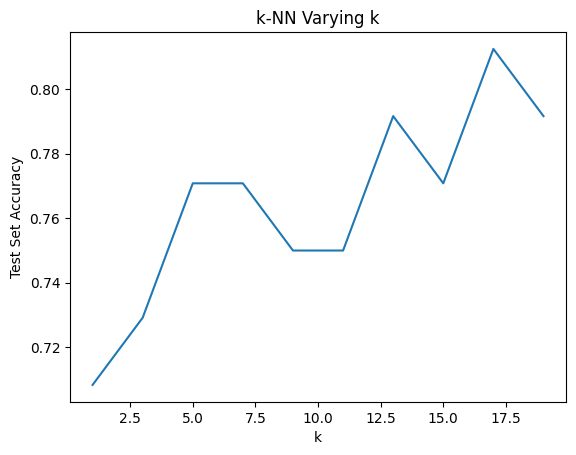

In [ ]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### XLS-R

In [ ]:
import os
from tqdm import tqdm
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC, Wav2Vec2Model
import torch
import librosa
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Inicializa o modelo Wav2Vec2 e o processor
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")

# Função para transcrever áudio individualmente
def transcribe_audio(audio_path):
    transcriptions = []
    speech, rate = librosa.load(audio_path, sr=16000)
    input_values = processor(speech, sampling_rate=16000, return_tensors="pt").input_values
    with torch.no_grad():
        logits = model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]
    transcriptions.append(transcription)
    return transcriptions

# Função para transcrever todos os áudios de uma pasta
def transcribe_audios(audio_folder):
    transcriptions = []
    for filename in tqdm(sorted(os.listdir(audio_folder))):
        if filename.endswith(".wav"):
            audio_path = os.path.join(audio_folder, filename)
            transcription = transcribe_audio(audio_path)
            transcriptions.extend(transcription)
    return transcriptions

# Caminhos das pastas
train_cc_path = "/content/drive/MyDrive/audios/train_cc"
train_cd_path = "/content/drive/MyDrive/audios/train_cd"
test_path = "/content/drive/MyDrive/audios/teste"

# Transcreve áudios de treino
x_train_cc = transcribe_audios(train_cc_path)
x_train_cd = transcribe_audios(train_cd_path)

# Combina as transcrições de treino e cria os labels
x_train = x_train_cc + x_train_cd
y_train = [0] * len(x_train_cc) + [1] * len(x_train_cd)

# Transcreve áudios de teste
x_test = transcribe_audios(test_path)

# Labels de teste fornecidos
y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

# Verificação final
print(f"x_train: {len(x_train)} samples")
print(f"y_train: {len(y_train)} labels")
print(f"x_test: {len(x_test)} samples")
print(f"y_test: {len(y_test)} labels")
print(x_train[0])
print(x_test[0])
print(y_train)

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

# Compute the NCD for the test data using the training data
test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-large-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You s

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

 22%|██▏       | 12/54 [16:26<51:04, 72.96s/it]

In [ ]:
import os
from tqdm import tqdm
from transformers import HubertForSequenceClassification, HubertTokenizer
import torch
import librosa
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Inicializa o modelo HuBERT e o tokenizer
model = HubertForSequenceClassification.from_pretrained("facebook/hubert-large-ls960-ft")
tokenizer = HubertTokenizer.from_pretrained("facebook/hubert-large-ls960-ft")

# Função para transcrever áudio individualmente
def transcribe_audio(audio_path):
    transcriptions = []
    speech, rate = librosa.load(audio_path, sr=16000)
    input_values = processor(speech, sampling_rate=16000, return_tensors="pt").input_values
    with torch.no_grad():
        logits = model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]
    transcriptions.append(transcription)
    return transcriptions

# Função para transcrever todos os áudios de uma pasta
def transcribe_audios(audio_folder):
    transcriptions = []
    for filename in tqdm(sorted(os.listdir(audio_folder))):
        if filename.endswith(".wav"):
            audio_path = os.path.join(audio_folder, filename)
            transcription = transcribe_audio(audio_path)
            transcriptions.extend(transcription)
    return transcriptions

# Caminhos das pastas
train_cc_path = "/content/drive/MyDrive/audios/train_cc"
train_cd_path = "/content/drive/MyDrive/audios/train_cd"
test_path = "/content/drive/MyDrive/audios/teste"

# Transcreve áudios de treino
x_train_cc = transcribe_audios(train_cc_path)
x_train_cd = transcribe_audios(train_cd_path)

# Combina as transcrições de treino e cria os labels
x_train = x_train_cc + x_train_cd
y_train = [0] * len(x_train_cc) + [1] * len(x_train_cd)

# Transcreve áudios de teste
x_test = transcribe_audios(test_path)

# Labels de teste fornecidos
y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

# Verificação final
print(f"x_train: {len(x_train)} samples")
print(f"y_train: {len(y_train)} labels")
print(f"x_test: {len(x_test)} samples")
print(f"y_test: {len(y_test)} labels")
print(x_train[0])
print(x_test[0])
print(y_train)

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = np.array([[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))])

# Compute the NCD for the test data using the training data
test_ncd = np.array([[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))])

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()